# 1.数据探究，可视化查看数据
## visualisasi data




In [1]:
#visualisasi data
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt


import cv2

In [2]:
#load image dataset
adenocarcinoma_path = 'D:/Class/second semester/CT5108 final project/archive (3)/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
large_path = 'D:/Class/second semester/CT5108 final project/archive (3)/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
normal_path = 'D:/Class/second semester/CT5108 final project/archive (3)/Data/train/normal'
squamous_path = 'D:/Class/second semester/CT5108 final project/archive (3)/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'

#将文件使用 os.listdir() 函数存储获取图像文件列表
adenocarcinoma = os.listdir(adenocarcinoma_path)
large = os.listdir(large_path)
normal = os.listdir(normal_path)
squamous = os.listdir(squamous_path)


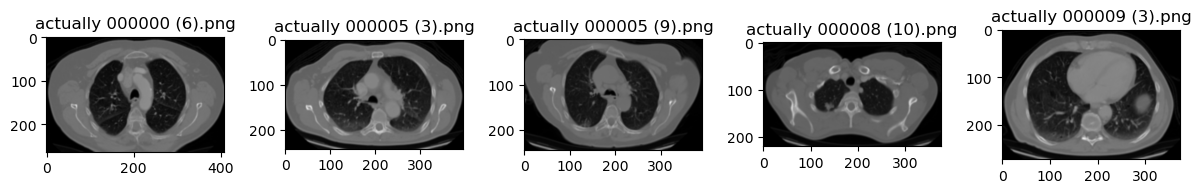

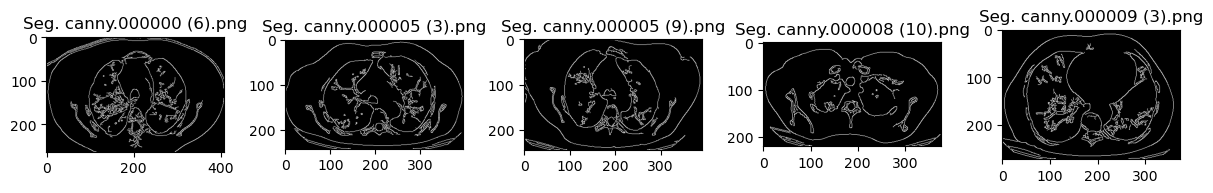

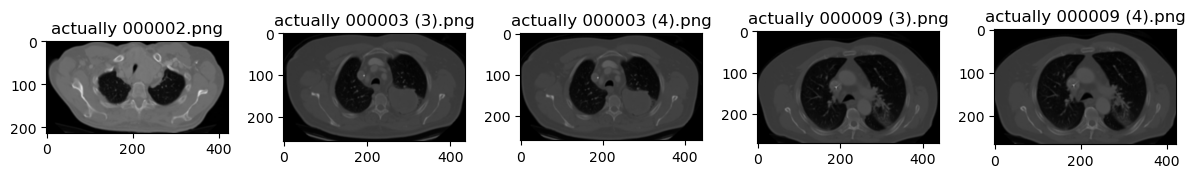

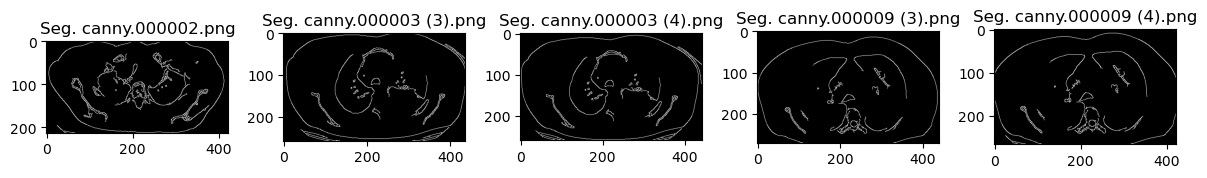

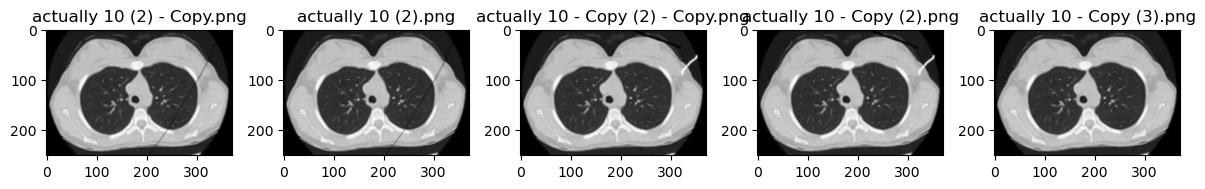

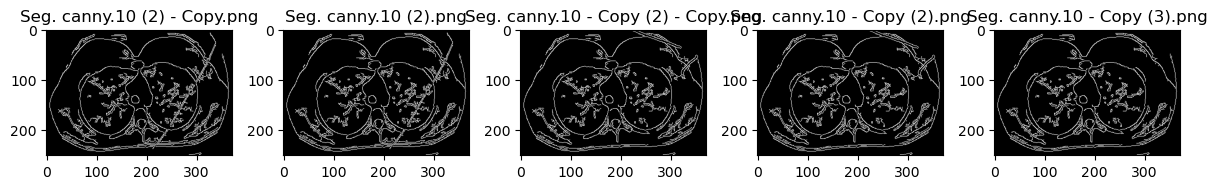

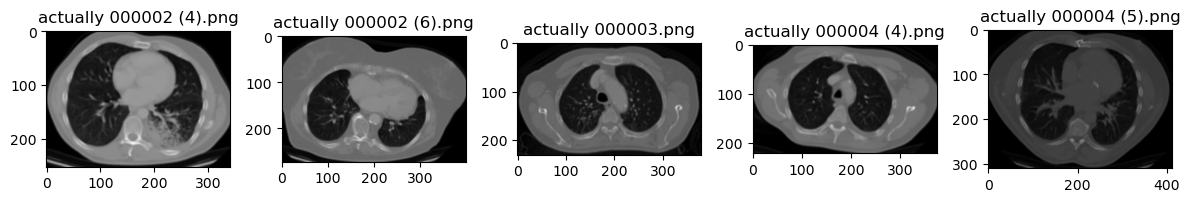

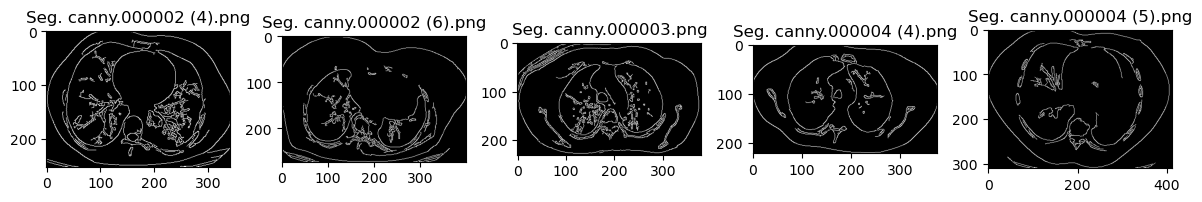

In [22]:
def plot_images(images_path, category_name):
    plt.figure(figsize=(12, 12))
    for i in range(5):
        plt.subplot(2, 5, i+1)  # Adjust the subplot layout to have two rows
        img = cv2.imread(os.path.join(images_path, category_name[i]))
        img = cv2.GaussianBlur(img, (5, 5), 0)
        plt.imshow(img, cmap='gray')
        plt.title(f'actually {category_name[i]}')  # Use the specific image name
        plt.tight_layout()

    plt.figure(figsize=(12, 12))
    for i in range(5):
        plt.subplot(2, 5, i+1)  # Adjust the subplot layout to have two rows
        img = cv2.imread(os.path.join(images_path, category_name[i]))
        edges = cv2.Canny(img, 25, 255, L2gradient=False)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Seg. canny.{category_name[i]}')  # Use the specific image name
        plt.tight_layout()

# Adenocarcinoma图像
plot_images(adenocarcinoma_path, adenocarcinoma)

# Large图像
plot_images(large_path, large)

# Normal图像
plot_images(normal_path, normal)

# Squamous图像
plot_images(squamous_path, squamous)


In [29]:
def extract_hu_moments(image):
    blurred_img = cv2.GaussianBlur(image, (3, 3), 0)
    edges = cv2.Canny(image, 25, 100)
    hu_moments = cv2.HuMoments(cv2.moments(edges)).flatten()
    return hu_moments

def process_images(image_paths, category_id):
    data = np.empty((0, 8), dtype=float)
    for image_path in image_paths:
        img = cv2.imread(image_path)
        hu_moments = extract_hu_moments(img)
        hu_moments = np.append(hu_moments, category_id)
        data = np.vstack((data, hu_moments))
    return data

x = np.array([['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'target']])

# Process Adenocarcinoma images
adenocarcinoma_data = process_images([os.path.join(adenocarcinoma_path, img) for img in adenocarcinoma], 1)
x = np.vstack((x, adenocarcinoma_data))

# Process Large images
large_data = process_images([os.path.join(large_path, img) for img in large], 2)
x = np.vstack((x, large_data))

# Process Normal images
normal_data = process_images([os.path.join(normal_path, img) for img in normal], 3)
x = np.vstack((x, normal_data))

# Process Squamous images
squamous_data = process_images([os.path.join(squamous_path, img) for img in squamous], 4)
x = np.vstack((x, squamous_data))


In [30]:
np.savetxt("D:/Class/second semester/CT5108 final project/visual data/chest-feature-images.csv", x, fmt='%s',delimiter=',')

In [31]:
visual_data = pd.read_csv('D:/Class/second semester/CT5108 final project/visual data/chest-feature-images.csv')
visual_data

,h1,h2,h3,h4,h5,h6,h7,target
0,0.004355,1.622618e-06,2.124112e-10,1.333353e-10,-2.236360e-20,-1.677945e-13,-1.839786e-21,1.0
1,0.004923,3.327664e-06,7.401989e-10,1.913278e-10,5.019934e-20,1.125288e-13,-5.161621e-20,1.0
2,0.005264,2.556616e-06,2.548871e-10,5.138772e-11,-3.935331e-21,-8.216547e-14,4.370492e-21,1.0
3,0.007827,1.350734e-05,1.407199e-08,1.641487e-09,4.696485e-18,5.670606e-12,6.338992e-18,1.0
4,0.004643,1.749409e-06,1.579329e-09,4.434090e-10,-2.960369e-19,2.892547e-13,2.237117e-19,1.0
...,...,...,...,...,...,...,...,...
608,0.002553,4.205177e-07,3.023919e-10,3.596408e-11,3.676545e-21,-7.187175e-15,-7.410941e-22,4.0
609,0.003203,1.603427e-06,2.443463e-10,4.732904e-10,7.199178e-20,5.773124e-13,1.439531e-19,4.0
610,0.003203,1.603427e-06,2.443463e-10,4.732904e-10,7.199178e-20,5.773124e-13,1.439531e-19,4.0
611,0.003164,1.804142e-06,1.858731e-10,4.025698e-11,2.659770e-21,4.289913e-15,2.247723e-21,4.0


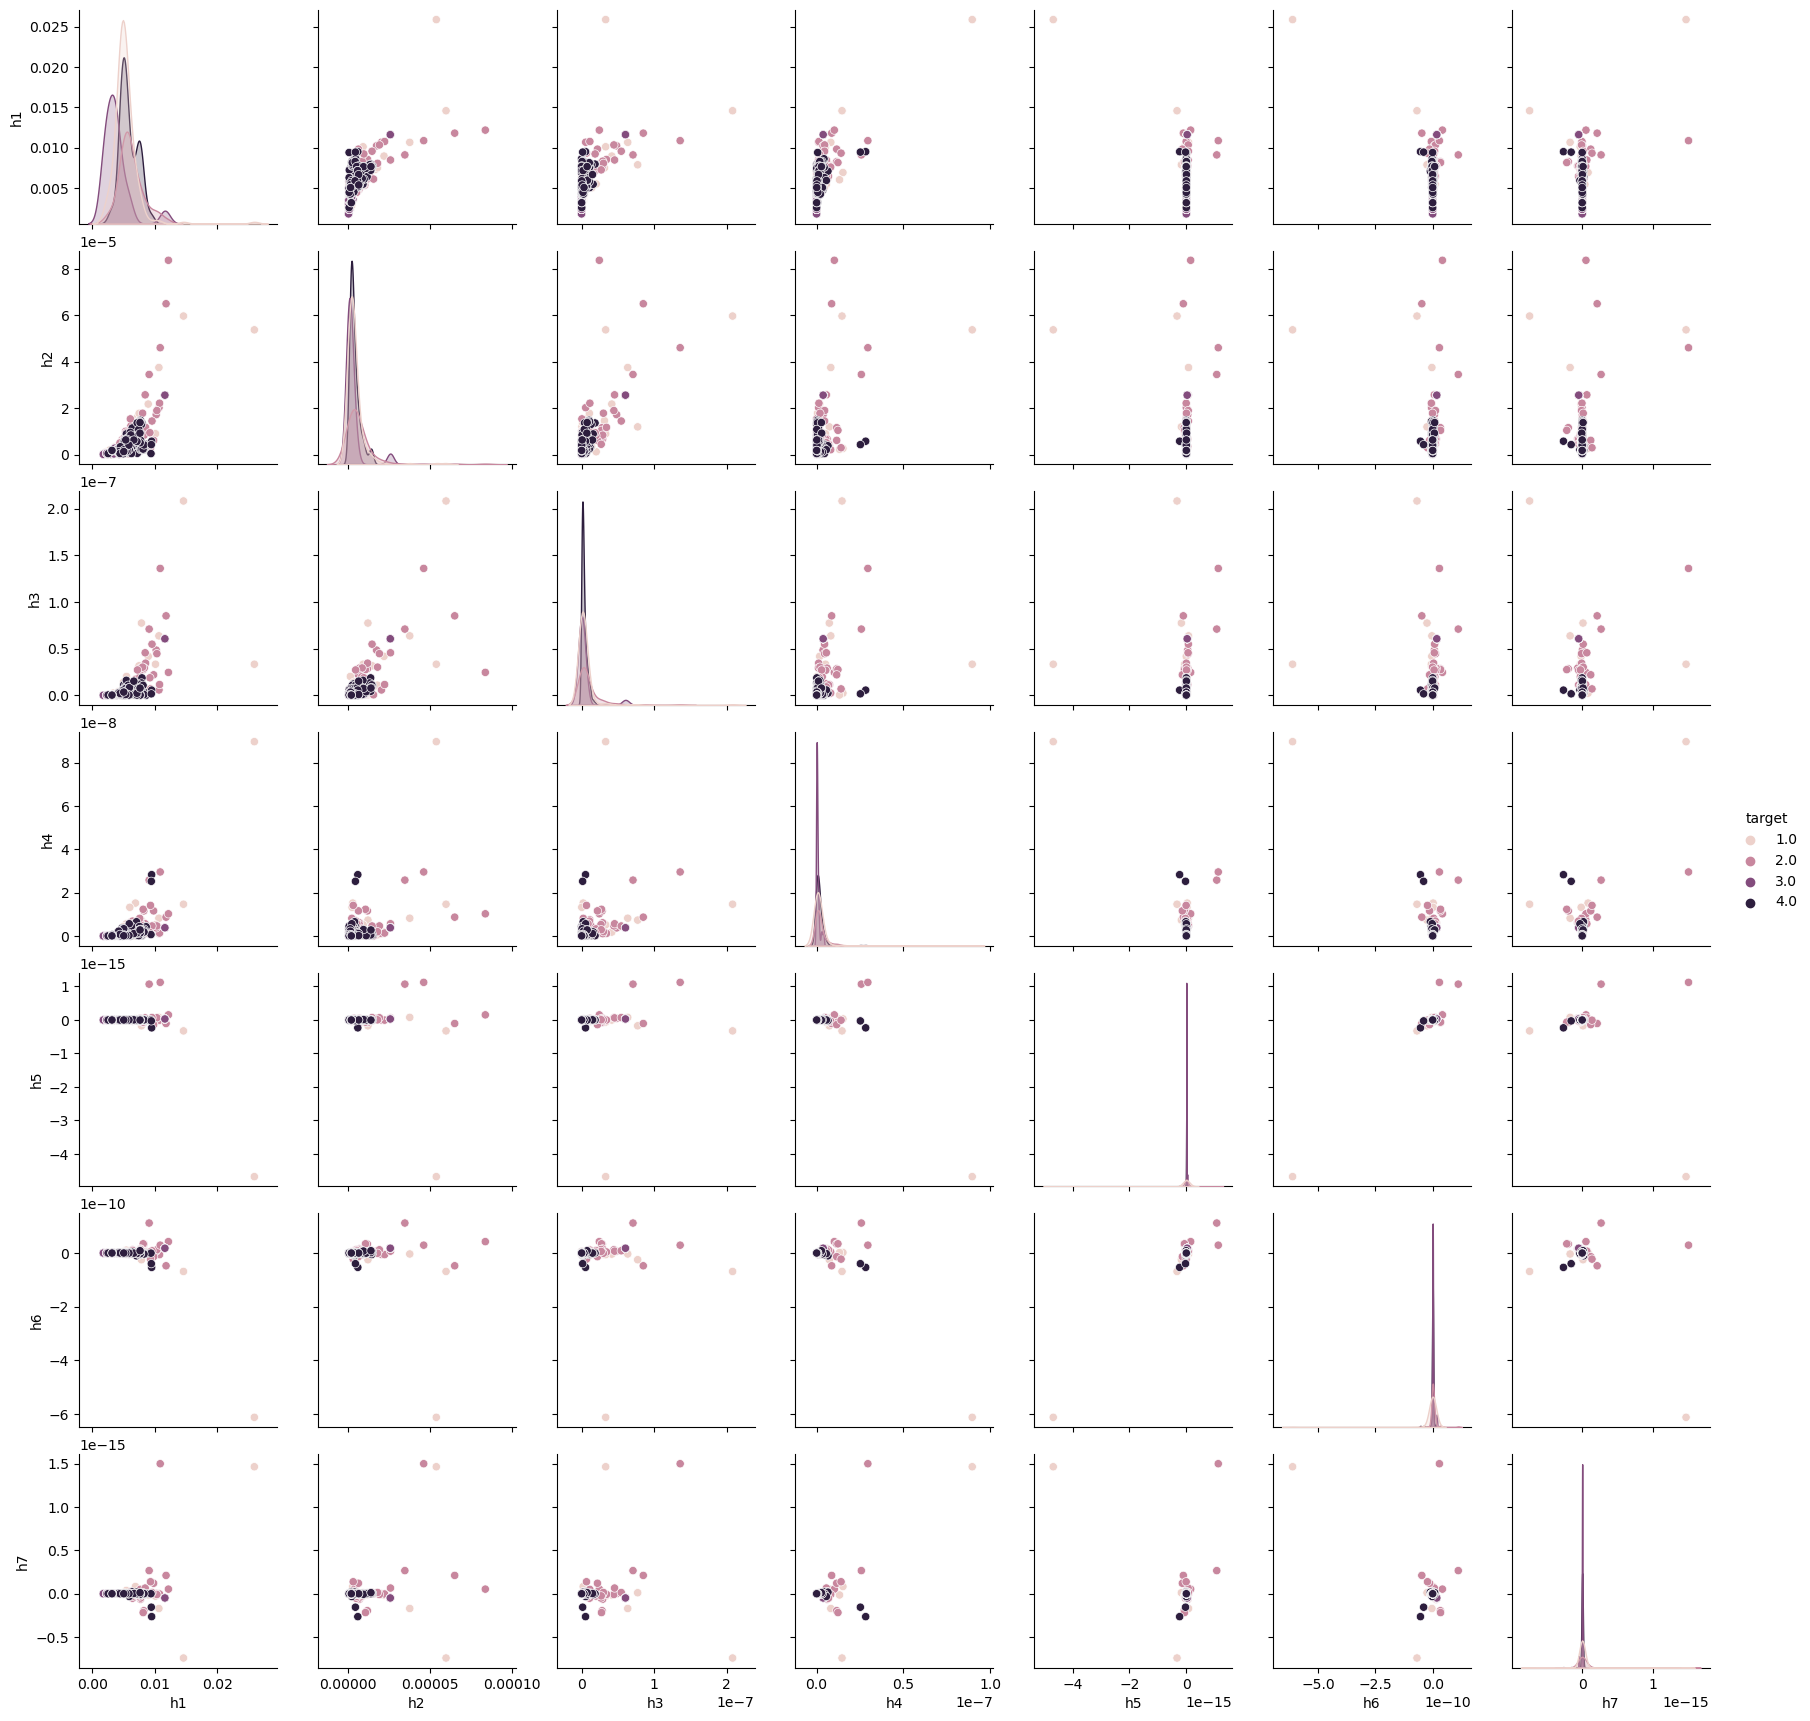

In [32]:
#使用 Seaborn 库的 pairplot 函数创建一个多变量散点图矩阵，用于可视化数据集中的多个数值特征之间的关系，并通过颜色来区分不同目标类别。
sns.pairplot(visual_data.iloc[: ,0:8], hue = 'target')

<AxesSubplot:>

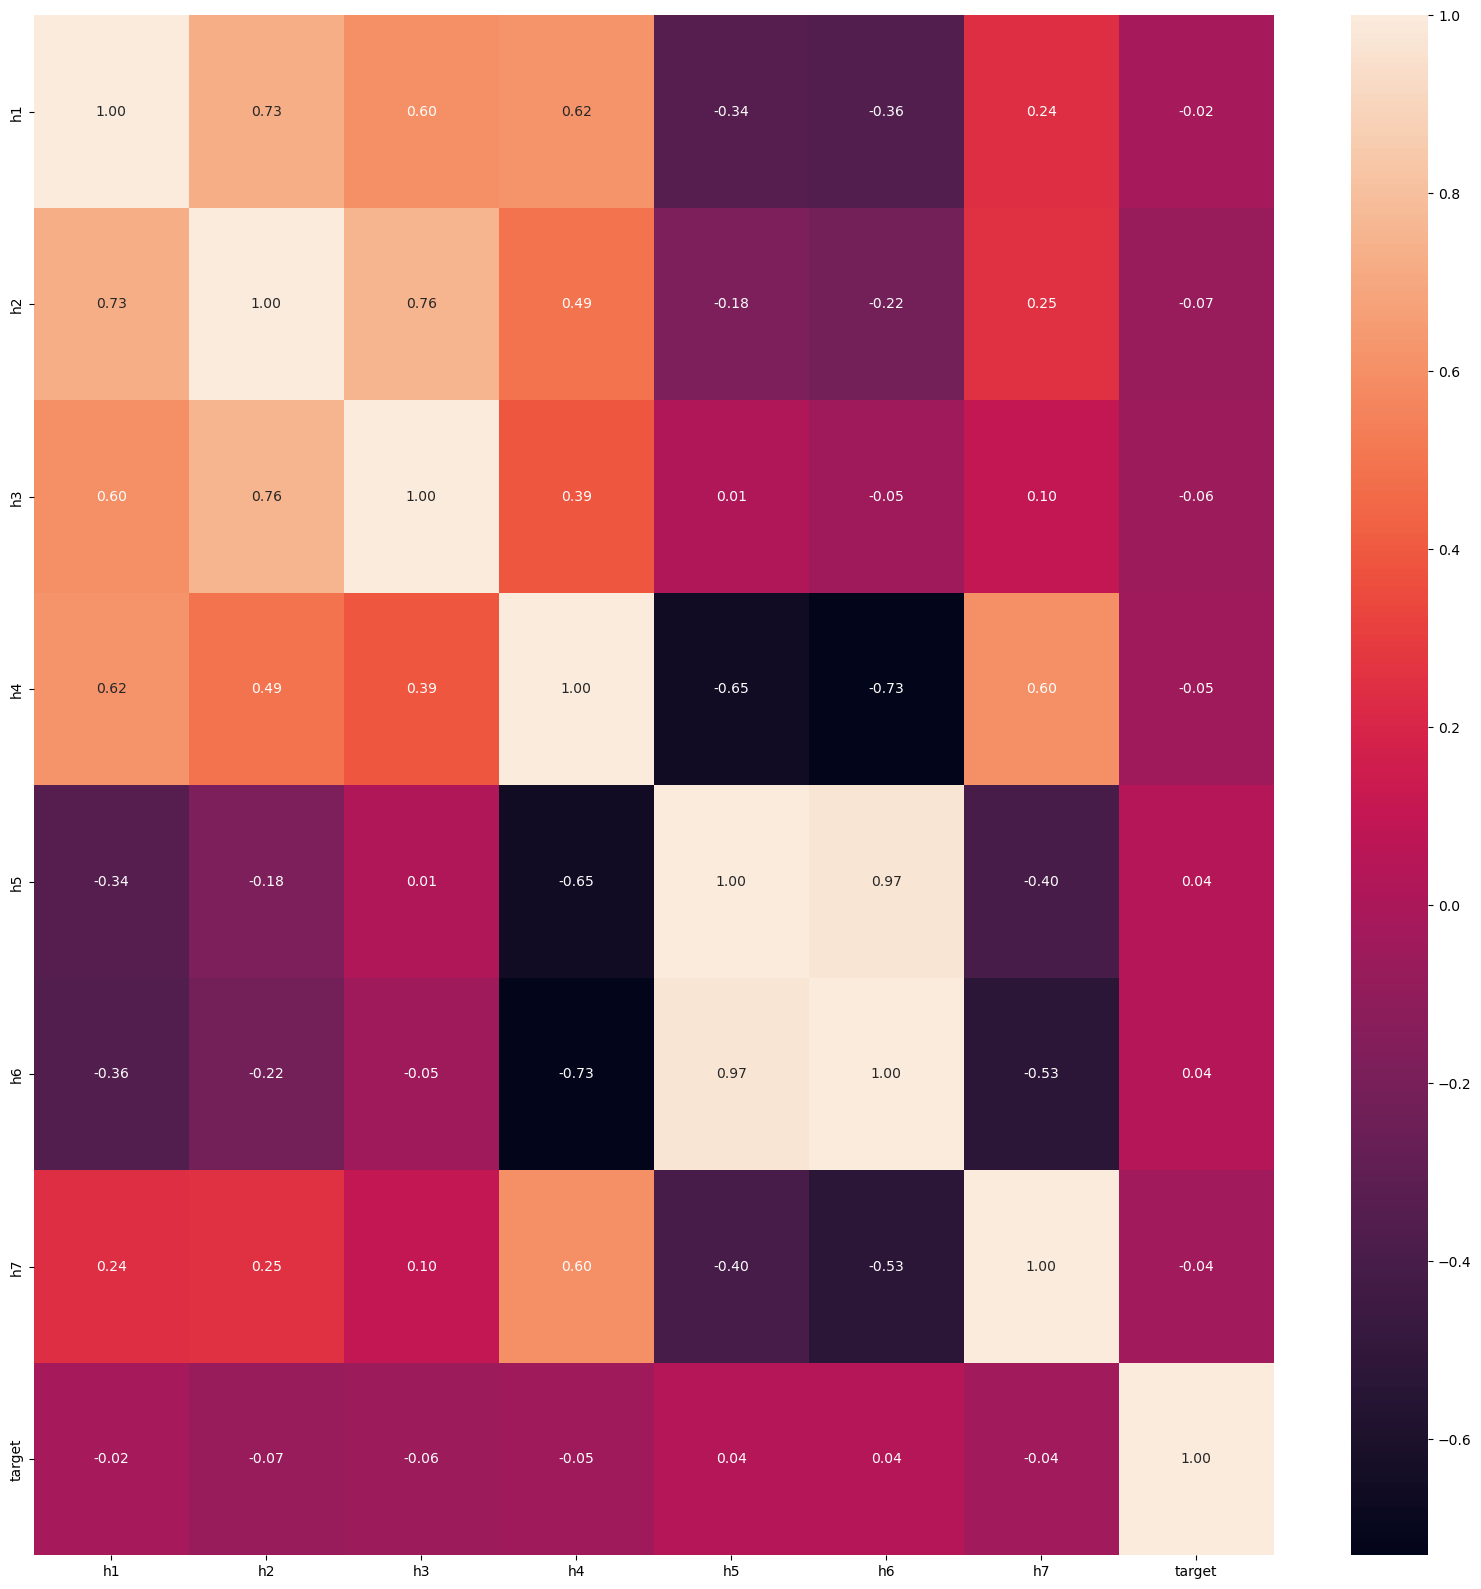

In [66]:
plt.subplots(figsize=(20, 20))
sns.heatmap(visual_data.corr(), annot=True, fmt='.2f')

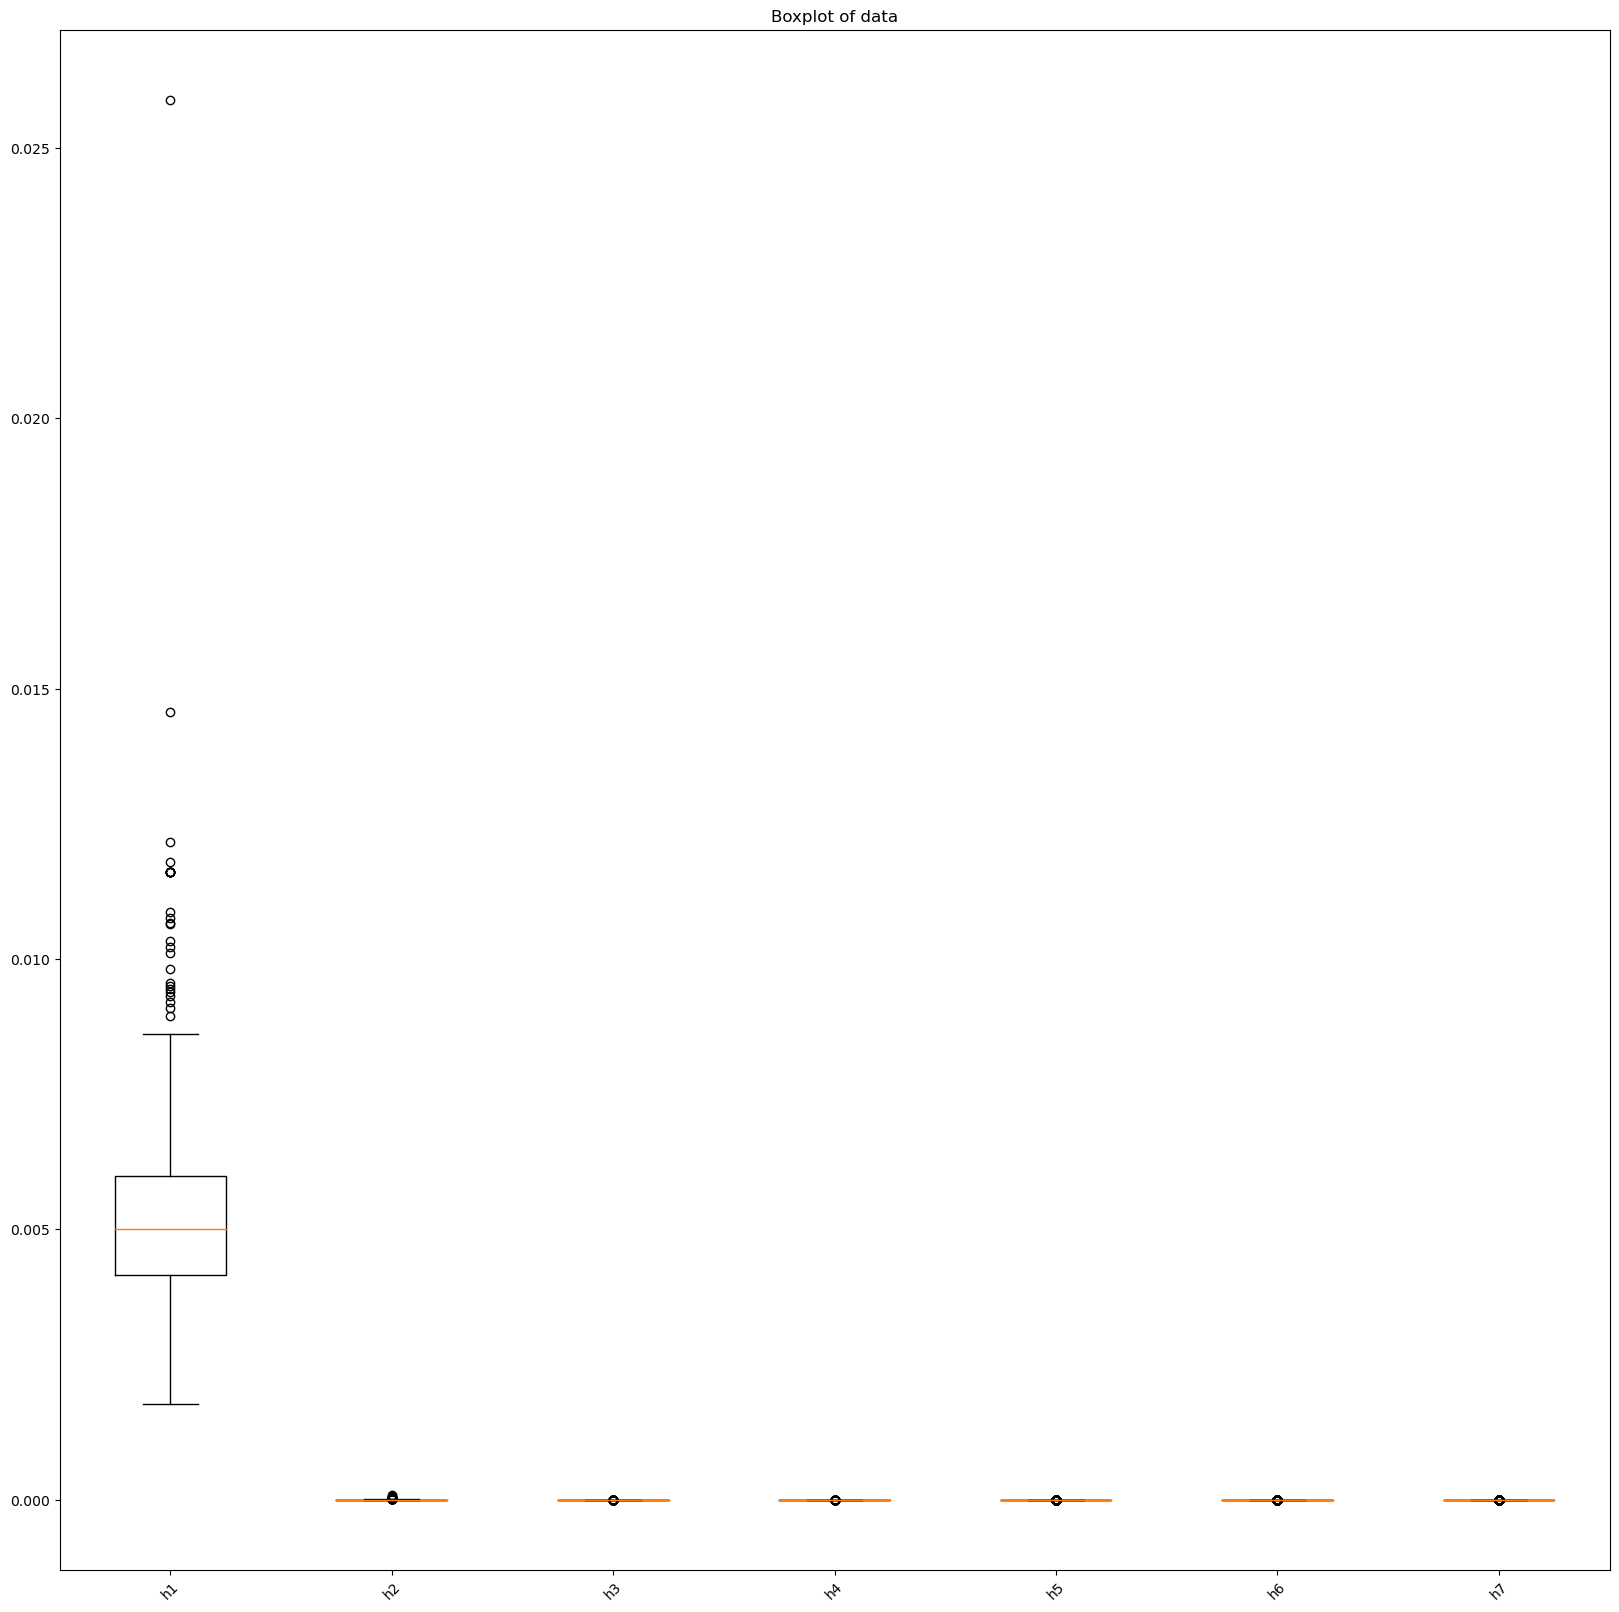

In [34]:
df1 = visual_data.iloc[:, :-1]
plt.figure(figsize=(20, 20))
plt.boxplot(df1.values)
plt.xticks(range(1, df1.shape[1] + 1), df1.columns, rotation=45)
plt.title("Boxplot of data")
plt.show()


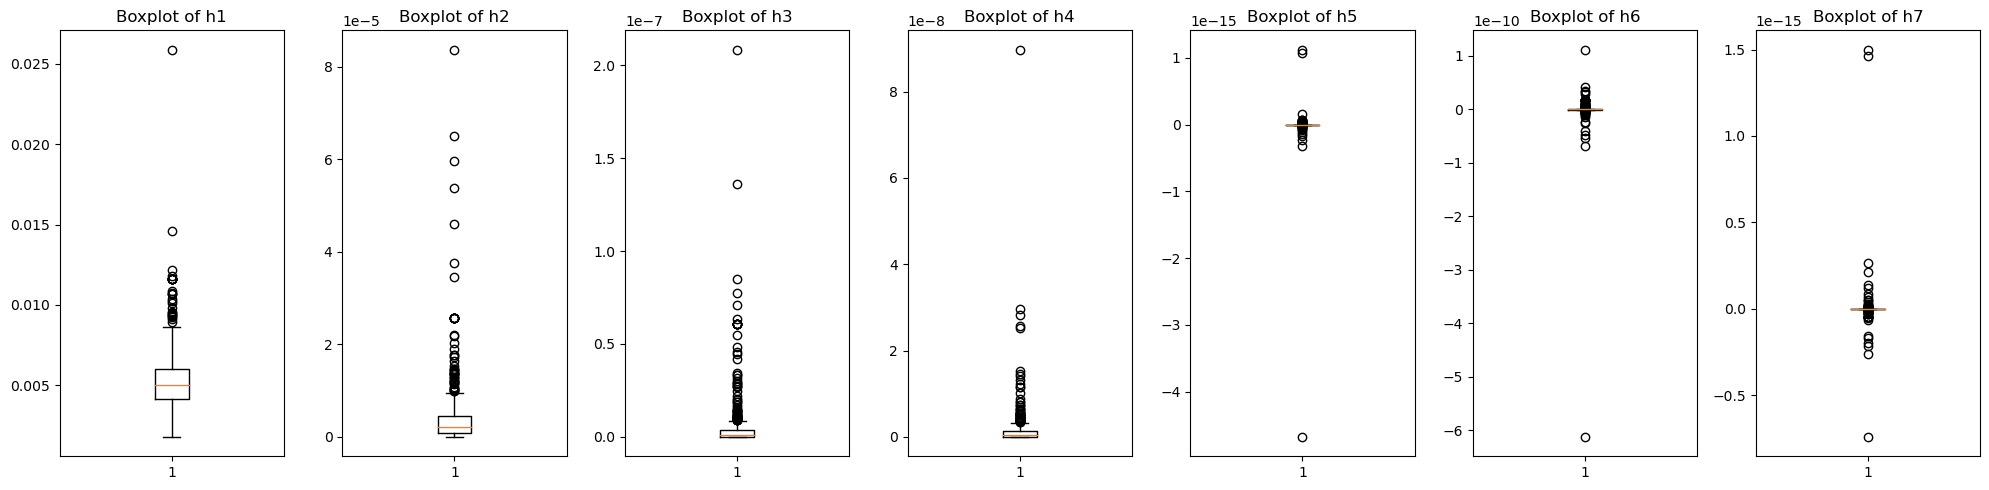

In [36]:

# 假设 df1 是你的 DataFrame，列名为 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7'
classes = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7']

# 创建一个 1x7 的子图布局
fig, axes = plt.subplots(1, len(classes), figsize=(20, 5))

# 循环遍历每个类别，绘制箱线图
for i, col in enumerate(classes):
    axes[i].boxplot(df1[col])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



In [40]:
visual_data.target.value_counts()


1.0    195
4.0    155
3.0    148
2.0    115
Name: target, dtype: int64